### Import Required Librarires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis
from lifelines import CoxPHFitter
from lifelines import WeibullFitter,ExponentialFitter,LogNormalFitter,LogLogisticFitter
from lifelines import WeibullAFTFitter

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['figure.figsize'] = 12,6

### READ THE DATASET

In [5]:
df = pd.read_csv("survival.csv")
df.head()

,Lifetime,Broken,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,Machine Name,Machine ID,Failure Model,Responsible Failure Cause
0,56,1,30.0,230.0,1.5,28.0,0.404,0.956,9.125,CNC Turning -1,20210045,Vibration Model,Y vibration is lower than Rated Y vibration
1,81,1,30.0,230.0,1.5,28.0,1.004,1.143,9.125,CNC Turning -2,20210046,Lifetime Model,Exceeded Motor Running Hours as respective Man...
2,60,0,30.0,230.0,1.5,34.0,0.469,1.290,9.121,CNC Turning -1,20210045,Healthy State,NaN
3,86,1,30.0,230.0,1.5,34.0,0.373,1.112,9.137,CNC Turning -2,20210046,Lifetime Model,Exceeded Motor Running Hours as respective Man...
4,30,0,30.0,230.0,1.5,31.0,0.461,1.282,9.121,CNC Turning -2,20210045,Healthy State,NaN


# Information from the data

In [6]:
class data_information():
    
    def __init__(self,data):
        self.data = data
        self.columns = list(self.data.columns)
        self.num_col = list(self.data.select_dtypes(include=np.number))
        self.cat_col = list(self.data.select_dtypes(include=object))
        
    def shape(self):
        print("Number of observations: "," ",self.data.shape[0])
        print("Number of features: "," ",self.data.shape[1])
        
    def info(self):
        self.data.info()
        
    def five_point_summary(self):
        print("\n For Categorical Variables:\n")
        print(self.data.select_dtypes(include=object).describe())
        print("\n For Numerical Variables: ")
        print(self.data.select_dtypes(include=np.number).describe(),"\n\n\n")
        
    def check_missing(self):
        missing = self.data.isnull().sum()
        percent = np.round((self.data.isnull().sum()*100/len(self.data)),2)
        null_df = pd.concat([missing,percent],keys=['Missing_values','Percentage missing'],axis=1)
        print(null_df)
        
    
    def outliers(self):
        for i in range(len(self.num_col)):
            plt.figure(figsize=(12,3))
            plt.subplot(1,2,1)
            sns.boxplot(self.data[self.num_col[i]])
            plt.tight_layout()
            plt.show()
            
    def check_unknown(self):
        for i in self.data.columns:
            print("\n\n\n",self.data[i].value_counts())

In [7]:
# Create object for class basic_information

di = data_information(df)

Number of observations:    1255
Number of features:    13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Lifetime                   1255 non-null   int64  
 1   Broken                     1255 non-null   int64  
 2   Temperature                1255 non-null   float64
 3   Voltage                    1255 non-null   float64
 4   Current                    1255 non-null   float64
 5   Humidity                   1255 non-null   float64
 6   Vibration - X              1255 non-null   float64
 7   Vibration  Y               1255 non-null   float64
 8   Vibration  Z               1255 non-null   float64
 9   Machine Name               1255 non-null   object 
 10  Machine ID                 1255 non-null   int64  
 11  Failure Model              1255 non-null   object 
 12  Responsible Failure Cause  777 non-null    obj

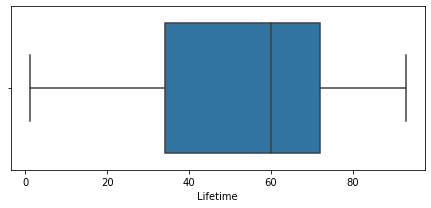

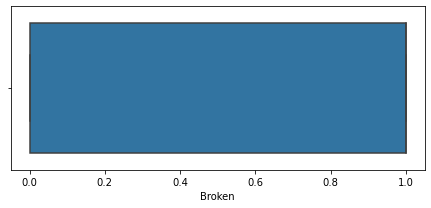

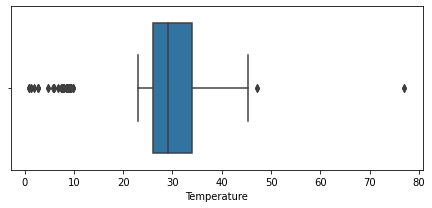

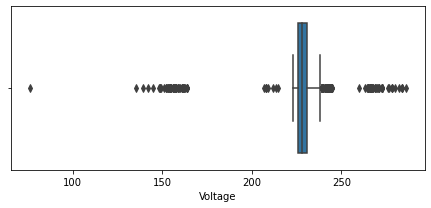

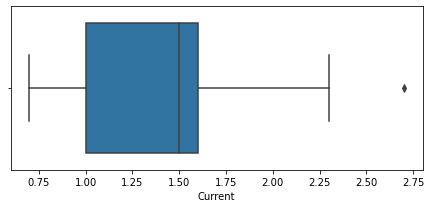

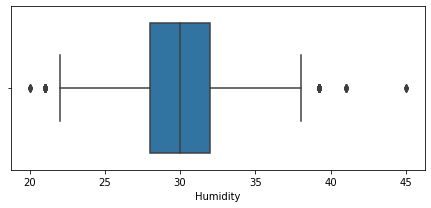

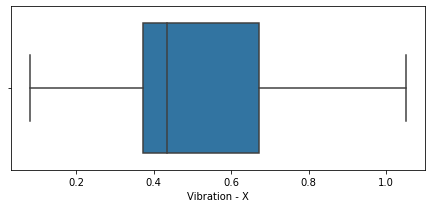

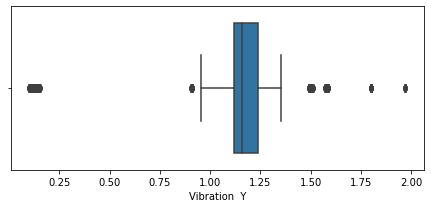

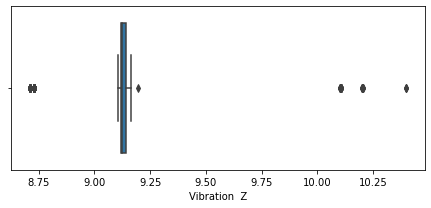

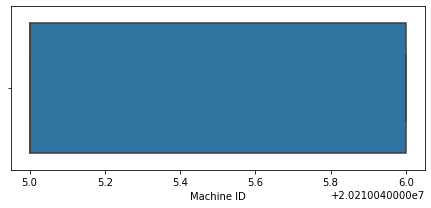




 65    126
80     86
63     58
62     52
60     44
71     35
77     30
74     29
12     25
58     24
76     23
13     20
48     20
1      20
72     19
75     18
49     18
18     17
81     17
24     17
57     16
16     16
25     16
46     16
55     16
19     16
56     16
35     16
79     16
92     16
26     16
93     14
43     12
53     12
20     12
45     12
29     12
30     12
34     12
52     12
61     12
4      12
9      11
88     10
85     10
73      9
54      8
51      8
50      8
38      8
64      8
22      8
66      8
68      8
31      8
39      8
36      8
41      8
5       8
40      8
8       8
3       8
7       8
28      8
86      5
44      5
23      5
82      5
17      5
47      4
42      4
59      4
14      4
33      4
21      4
78      4
27      4
83      3
84      3
Name: Lifetime, dtype: int64



 1    777
0    478
Name: Broken, dtype: int64



 27.00    125
26.00    124
29.00    118
30.00     91
28.00     89
31.00     89
25.00     77
24.00     73
38.00     58
32.00  

In [8]:
# calling object

di.shape()
di.info()
di.five_point_summary()
di.check_missing()
di.outliers()
di.check_unknown()

### Exploratory Data Analysis

In [9]:
df['Broken'] = df['Broken'].astype(object)

In [10]:
class univariate():
    
    def __init__(self,data):
        self.data = data
        self.num_col = list(self.data.select_dtypes(include=np.number))
        self.cat_col = list(self.data.select_dtypes(include=object))
        
        
    def uni_plot(self):
        for i in range(len(self.cat_col)):
            plt.subplot(1,1,1)
            sns.countplot(self.data[self.cat_col[i]])
            plt.tight_layout()
            plt.show()   

In [11]:
up = univariate(df)

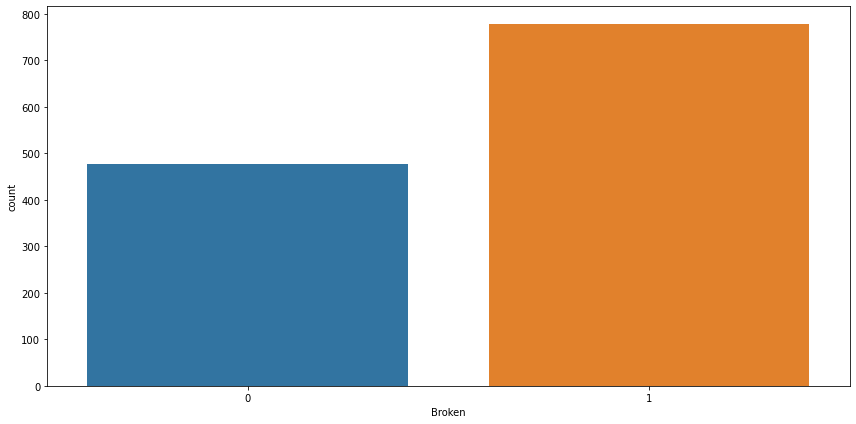

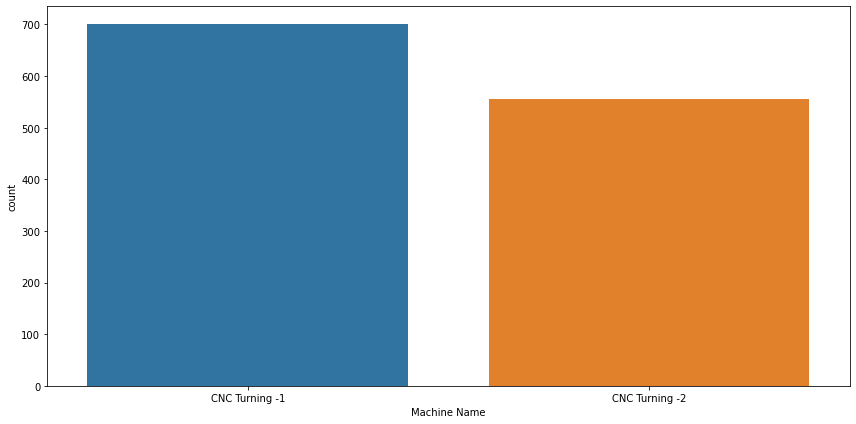

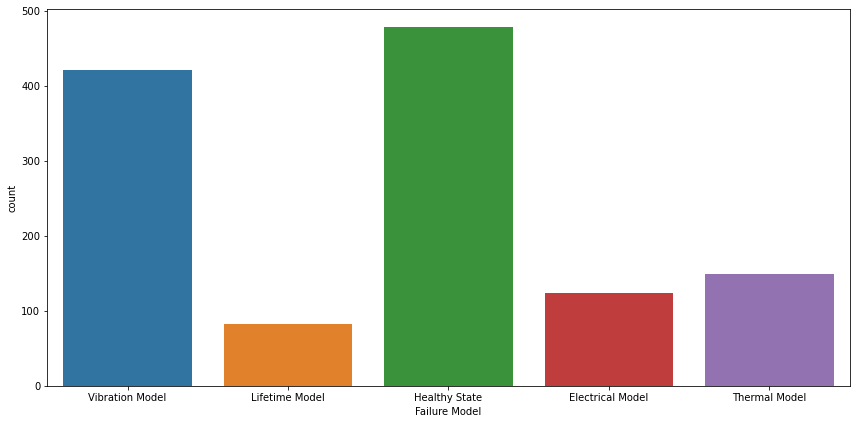

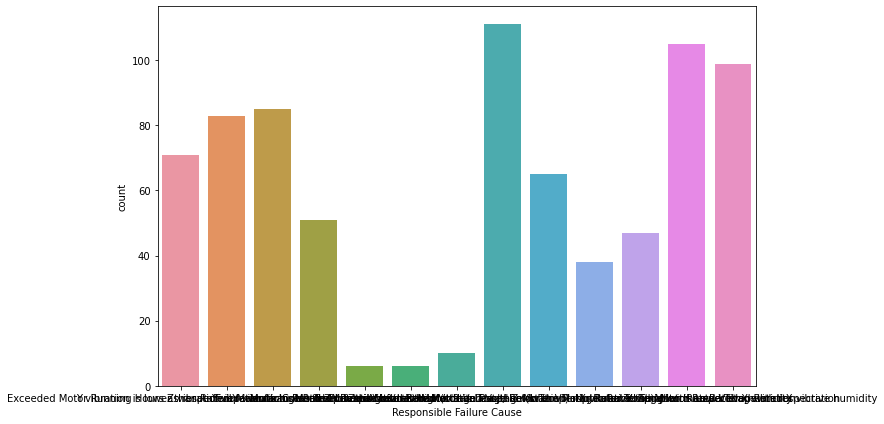

In [12]:
up.uni_plot()

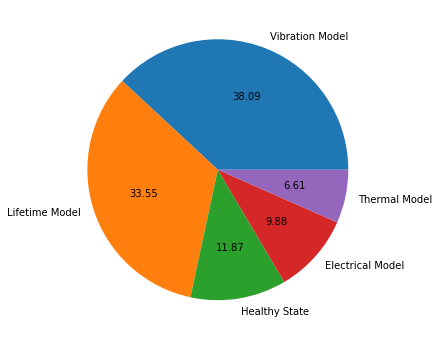

In [13]:
plt.pie(x=df['Failure Model'].value_counts(),autopct = '%.2f',labels=df['Failure Model'].unique())
plt.show()

<AxesSubplot:ylabel='Lifetime'>

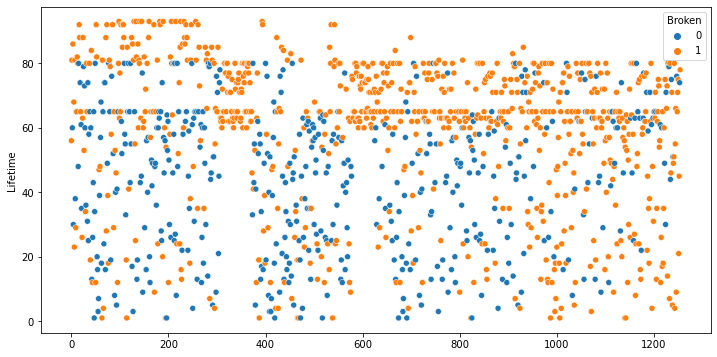

In [14]:
sns.scatterplot(x=df.index, y=df['Lifetime'], hue=df['Broken'])

In [15]:
#### convert {Broken dataype from integer to boolean}

In [16]:
df["Broken"] = df["Broken"].astype("bool")

### Realtionship b/w two different groups of machines

Text(0.5, 0, 'time $t$')

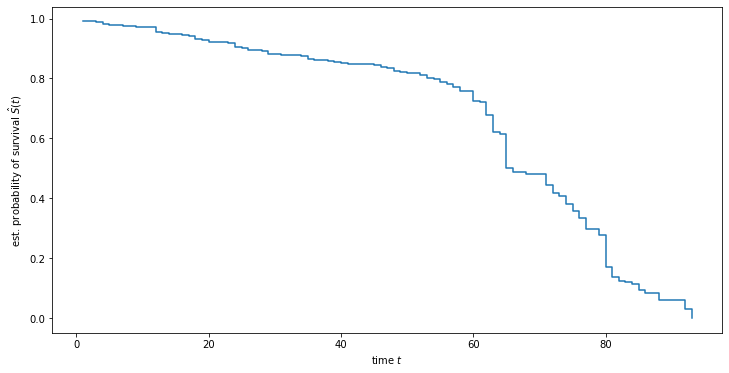

In [17]:
time, survival_prob = kaplan_meier_estimator(df["Broken"], df["Lifetime"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [18]:
df.columns

Index(['Lifetime', 'Broken', 'Temperature', 'Voltage', 'Current', 'Humidity',
       'Vibration - X', 'Vibration  Y', 'Vibration  Z', 'Machine Name',
       'Machine ID', 'Failure Model', 'Responsible Failure Cause'],
      dtype='object')

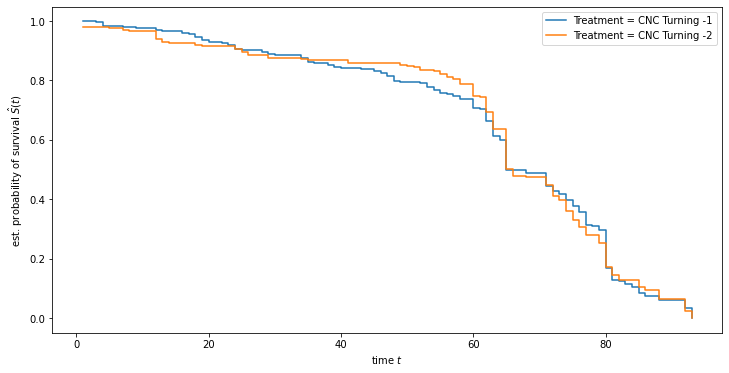

In [19]:
for machine in ("CNC Turning -1", "CNC Turning -2"):
    mask_treat = df["Machine Name"] == machine
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        df["Broken"][mask_treat],
        df["Lifetime"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Treatment = %s" % machine)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

## Data Prepration for Modelling

In [20]:
columns = ['Lifetime', 'Broken', 'Temperature', 'Voltage', 'Current', 'Humidity',
       'Vibration - X', 'Vibration  Y', 'Vibration  Z']
data = df.loc[:,columns]
data.head()

,Lifetime,Broken,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z
0,56,True,30.0,230.0,1.5,28.0,0.404,0.956,9.125
1,81,True,30.0,230.0,1.5,28.0,1.004,1.143,9.125
2,60,False,30.0,230.0,1.5,34.0,0.469,1.290,9.121
3,86,True,30.0,230.0,1.5,34.0,0.373,1.112,9.137
4,30,False,30.0,230.0,1.5,31.0,0.461,1.282,9.121


## USING COX HAZARD MODEL

In [21]:
# Initialize and fit the model
coxph = CoxPHFitter()
coxph.fit(data, duration_col='Lifetime', event_col='Broken')
# Print model summary
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 1255 total observations, 478 right-censored observations>
             duration col = 'Lifetime'
                event col = 'Broken'
      baseline estimation = breslow
   number of observations = 1255
number of events observed = 777
   partial log-likelihood = -4576.30
         time fit was run = 2022-05-13 06:42:38 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
Temperature     0.01       1.01       0.00             0.00             0.02                 1.00                 1.02
Voltage         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Current        -0.13       0.88       0.12            -0.38             0.11                 0.69                 1.12
Humidity        0.02       1.02       0.01            -0.00             0.03                 1.00                 1.04
Vibration - X   0.43       1.53       0.13             0.16             0.69                 1.18                 1.99
Vibration  Y    0.01       1.01       0.10            -0.18             0.20                 0.83                 1.22
Vibration  Z   -1.51       0.22       0.34            -2.17            -0.86                 0.11                 0.43

                cmp to     z      p   -log2(p)
covariate                                     
Temperature       0.00  2.14   0.03       4.97
Voltage           0.00  0.42   0.68       0.56
Current           0.00 -1.06   0.29       1.79
Humidity          0.00  1.70   0.09       3.48
Vibration - X     0.00  3.16 <0.005       9.32
Vibration  Y      0.00  0.08   0.93       0.10
Vibration  Z      0.00 -4.50 <0.005      17.18
---
Concordance = 0.54
Partial AIC = 9166.61
log-likelihood ratio test = 40.16 on 7 df
-log2(p) of ll-ratio test = 19.70

<AxesSubplot:xlabel='log(HR) (95% CI)'>

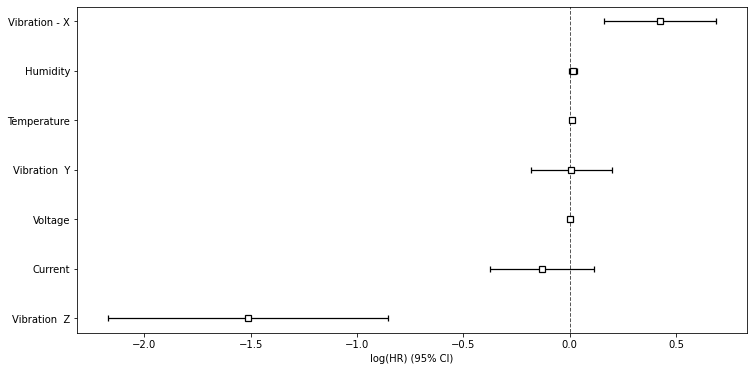

In [22]:
# Plot factor effects 
coxph.plot()

In [23]:
# Check the Cox-PH model assumptions
coxph.check_assumptions(data)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1255 total observations, 478 right-censored observations>
         test_name = proportional_hazard_test

---
                    test_statistic      p  -log2(p)
Current       km              0.34   0.56      0.83
              rank            0.13   0.72      0.48
Humidity      km              0.01   0.91      0.13
              rank            0.01   0.94      0.09
Temperature   km              0.05   0.82      0.28
              rank            0.32   0.57      0.80
Vibration  Y  km              0.04   0.85      0.24
              rank            0.00   0.96      0.06
Vibration  Z  km             20.59 <0.005     17.42
              rank           28.99 <0.005     23.72
Vibration - X km            105.83 <0.005     80.04
              rank          101.02 <0.005     76.54
Voltage       km              0.26   0.61      0.70
              rank            0.01   0.92      0.12



1. Variable 'Vibration - X' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'Vibration - X' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Vibration - X' using pd.cut, and then specify it in
`strata=['Vibration - X', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Vibration  Z' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'Vibration  Z' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on

[]

##  DATA Preparation For ["Model Prediction"]

In [24]:
# Current machines
df_new = data.loc[data['Broken'] == 0]

# hours of running
df_new_obs = df_new['Lifetime']

### Predictions 

In [25]:
# Predict survival probabilities 
results = coxph.predict_survival_function(df_new,conditional_after=df_new_obs)

In [26]:
results.head()

,2,4,8,10,14,15,18,20,21,25,27,28,30,33,34,35,36,38,40,42,44,45,46,47,48,49,53,54,55,56,58,60,61,62,65,67,68,69,70,74,77,79,81,83,86,89,91,93,94,96,103,104,109,110,111,112,116,117,119,120,121,122,123,125,127,130,135,136,142,144,146,147,151,154,155,157,158,161,162,165,166,167,168,172,173,175,176,179,180,181,184,185,186,187,190,191,193,196,197,198,199,201,202,205,207,209,211,212,213,214,216,218,219,221,228,230,235,237,240,241,242,243,248,249,250,252,253,254,255,258,259,262,265,267,268,269,270,271,272,274,275,277,281,282,283,284,286,287,288,291,292,293,298,299,301,303,304,305,306,373,374,376,377,379,380,384,385,388,389,390,391,392,395,397,400,401,403,404,406,407,408,409,411,412,414,416,417,418,419,420,422,429,430,432,434,435,436,438,440,441,442,443,444,447,448,449,450,451,453,455,456,457,458,459,463,464,469,470,471,472,474,476,477,478,481,483,485,486,488,489,490,491,493,495,497,498,499,500,502,503,504,505,508,509,510,513,514,517,518,519,520,523,525,526,527,529,536,537,539,540,547,549,551,555,556,557,558,560,561,562,563,564,565,567,568,569,570,576,577,625,627,629,634,640,646,647,656,659,661,662,665,668,670,671,674,675,681,682,683,684,686,688,689,690,691,693,695,698,702,705,709,711,714,717,719,721,722,731,732,738,739,740,741,742,745,749,752,754,756,764,765,771,773,775,776,780,783,784,786,787,790,791,794,795,796,797,801,802,804,805,810,814,815,819,820,822,825,826,827,828,830,831,834,838,840,841,843,845,848,857,859,864,866,869,870,871,872,879,881,882,888,894,896,897,898,901,904,906,910,915,916,917,920,921,922,927,928,930,932,933,935,936,937,946,952,955,973,974,979,983,988,991,994,1013,1020,1021,1024,1027,1032,1037,1046,1049,1051,1055,1056,1058,1059,1062,1064,1065,1067,1073,1079,1081,1086,1088,1091,1095,1107,1111,1113,1114,1116,1119,1122,1125,1131,1133,1137,1152,1155,1158,1161,1164,1167,1171,1174,1178,1179,1181,1185,1188,1192,1195,1198,1201,1204,1213,1216,1222,1224,1225,1231,1234,1236,1239,1247,1253
1.0,0.995453,0.998072,0.995440,0.981772,0.995829,0.804824,0.949642,0.988878,0.998125,0.701653,0.937086,0.995681,0.998045,1.000000,0.944238,0.993996,1.000000,0.981827,0.995836,0.999257,0.999159,0.998869,0.981523,0.999281,0.991126,0.818340,0.999204,0.998437,0.994037,0.999340,0.999522,0.985525,0.977341,0.994094,0.980480,0.995696,0.987119,0.948005,0.998217,0.997660,0.793402,0.983371,0.996009,0.910912,0.990019,0.996434,0.996071,0.998064,1.000000,0.982589,0.932902,0.990257,0.818729,1.000000,0.991883,0.994205,0.979704,0.818515,0.980679,0.980512,0.998953,0.804244,0.991919,0.991080,0.993697,0.982000,0.999216,0.996099,0.999108,0.995412,0.995079,0.995589,0.998114,0.998241,0.991383,0.996058,0.984457,0.999187,0.994364,0.999055,0.999009,0.997862,0.981931,0.996124,0.997843,0.998164,0.996007,0.996078,0.996006,0.991073,0.981737,0.992635,0.995149,0.948587,0.986122,0.995436,0.991392,0.999267,0.825382,0.994739,0.930410,0.998993,0.998181,0.999118,0.832406,0.995921,1.000000,0.994950,0.822583,0.996115,0.996423,0.820405,0.995561,0.979036,0.996135,1.000000,0.930494,0.981889,0.996164,0.994795,0.963930,0.997959,0.823139,0.949258,0.998627,0.991802,1.000000,0.981972,0.982201,0.982199,0.999266,0.995842,0.997230,0.946791,0.994260,0.999047,0.995807,0.981766,0.994204,0.995982,0.997644,0.998199,0.997470,0.820731,0.674116,0.704732,0.814550,0.997836,0.996289,0.998210,0.993620,0.993914,0.995119,0.909405,0.952204,0.999139,0.994915,0.945419,0.941196,0.994205,0.818515,0.998953,0.991919,0.998064,1.000000,0.932902,0.990257,1.000000,0.991883,0.999196,0.988180,0.991080,0.998217,0.997660,0.793402,0.996009,0.910912,0.990019,0.996434,0.996071,0.993697,0.993914,0.994037,0.999340,0.999522,0.985525,0.977341,0.994094,0.999236,0.980480,0.995696,0.995119,0.909405,0.952204,0.999139,0.994915,0.941196,0.999257,0.999159,0.998869,0.991126,0.999204,0.998437,1.000000,0.994260,0.994204,0.997644,0.998199,0.997470,0.814550,0.997836,0.996289,0.998210,0.993620,0.998045,1.000000,0.993996,1.000000,0.995545,0.999281,0.994795,0.998627,0.991802,0.999047,0.995440,0.995829,0.988878,0.998125,0.930494,0.996164,0

### Converting Probabilities into Predicted Lifetime Values

In [27]:
results.columns
machine = []
lifetime = []
for i in results.columns:
    machine.append(i)
    lifetime.append(results.index[results[i]==results[i].quantile(0.5)][0])

In [28]:
result = pd.DataFrame({'machine':machine,'pred_lifetime':lifetime})
df_new['machine'] = df_new.index
output = pd.merge(df_new,result,on=["machine", "machine"])
output['RUL'] = output.pred_lifetime - output.Lifetime
output.head()

,Lifetime,Broken,Temperature,Voltage,Current,Humidity,Vibration - X,Vibration Y,Vibration Z,machine,pred_lifetime,RUL
0,60,False,30.0,230.0,1.5,34.0,0.469,1.290,9.121,2,33.0,-27.0
1,30,False,30.0,230.0,1.5,31.0,0.461,1.282,9.121,4,47.0,17.0
2,38,False,29.0,229.0,1.6,28.0,0.412,1.243,9.133,8,47.0,9.0
3,65,False,29.0,229.0,1.6,28.0,0.488,1.120,9.125,10,28.0,-37.0
4,48,False,29.0,229.0,1.6,29.0,0.404,1.355,9.121,14,45.0,-3.0


In [29]:
#predictions = coxph.predict_log_partial_hazard(df_new)
#predictions.head()